# Human Activity Recognition #

**Importing Necessary Libraries**

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

**Loading the combined test and train dataset**

In [2]:
train_data = os.path.join('../Combined/Train')
test_data = os.path.join('../Combined/Test')
activities = ['LAYING', 'SITTING', 'STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
x_train=[]
y_train=[]
x_test=[]
y_test=[]
for activity in activities:
    folder = os.path.join(train_data,activity)
    data = os.listdir(folder)
    # print(len(data))
    for csv in data:
        df=pd.read_csv(os.path.join(train_data,activity,csv),header=0)
        x_train.append(df.values[:500])
        y_train.append(activity)
for activity in activities:
    folder = os.path.join(test_data,activity)
    data = os.listdir(folder)
    # print(len(data))
    for csv in data:
        df=pd.read_csv(os.path.join(test_data,activity,csv),header=0)
        x_test.append(df.values[:500])
        y_test.append(activity)
    

In [3]:
x_train=np.array(x_train)
y_train=np.array(y_train)
print(f"Shape of X_train = {x_train.shape}") 
print(f'Shape of y_train = {y_train.shape}')

x_test=np.array(x_test)
y_test=np.array(y_test)
print(f"Shape of X_test = {x_test.shape}")
print(f'Shape of y_test = {y_test.shape}')

Shape of X_train = (126, 500, 3)
Shape of y_train = (126,)
Shape of X_test = (54, 500, 3)
Shape of y_test = (54,)


**Task 1 - Question 1**

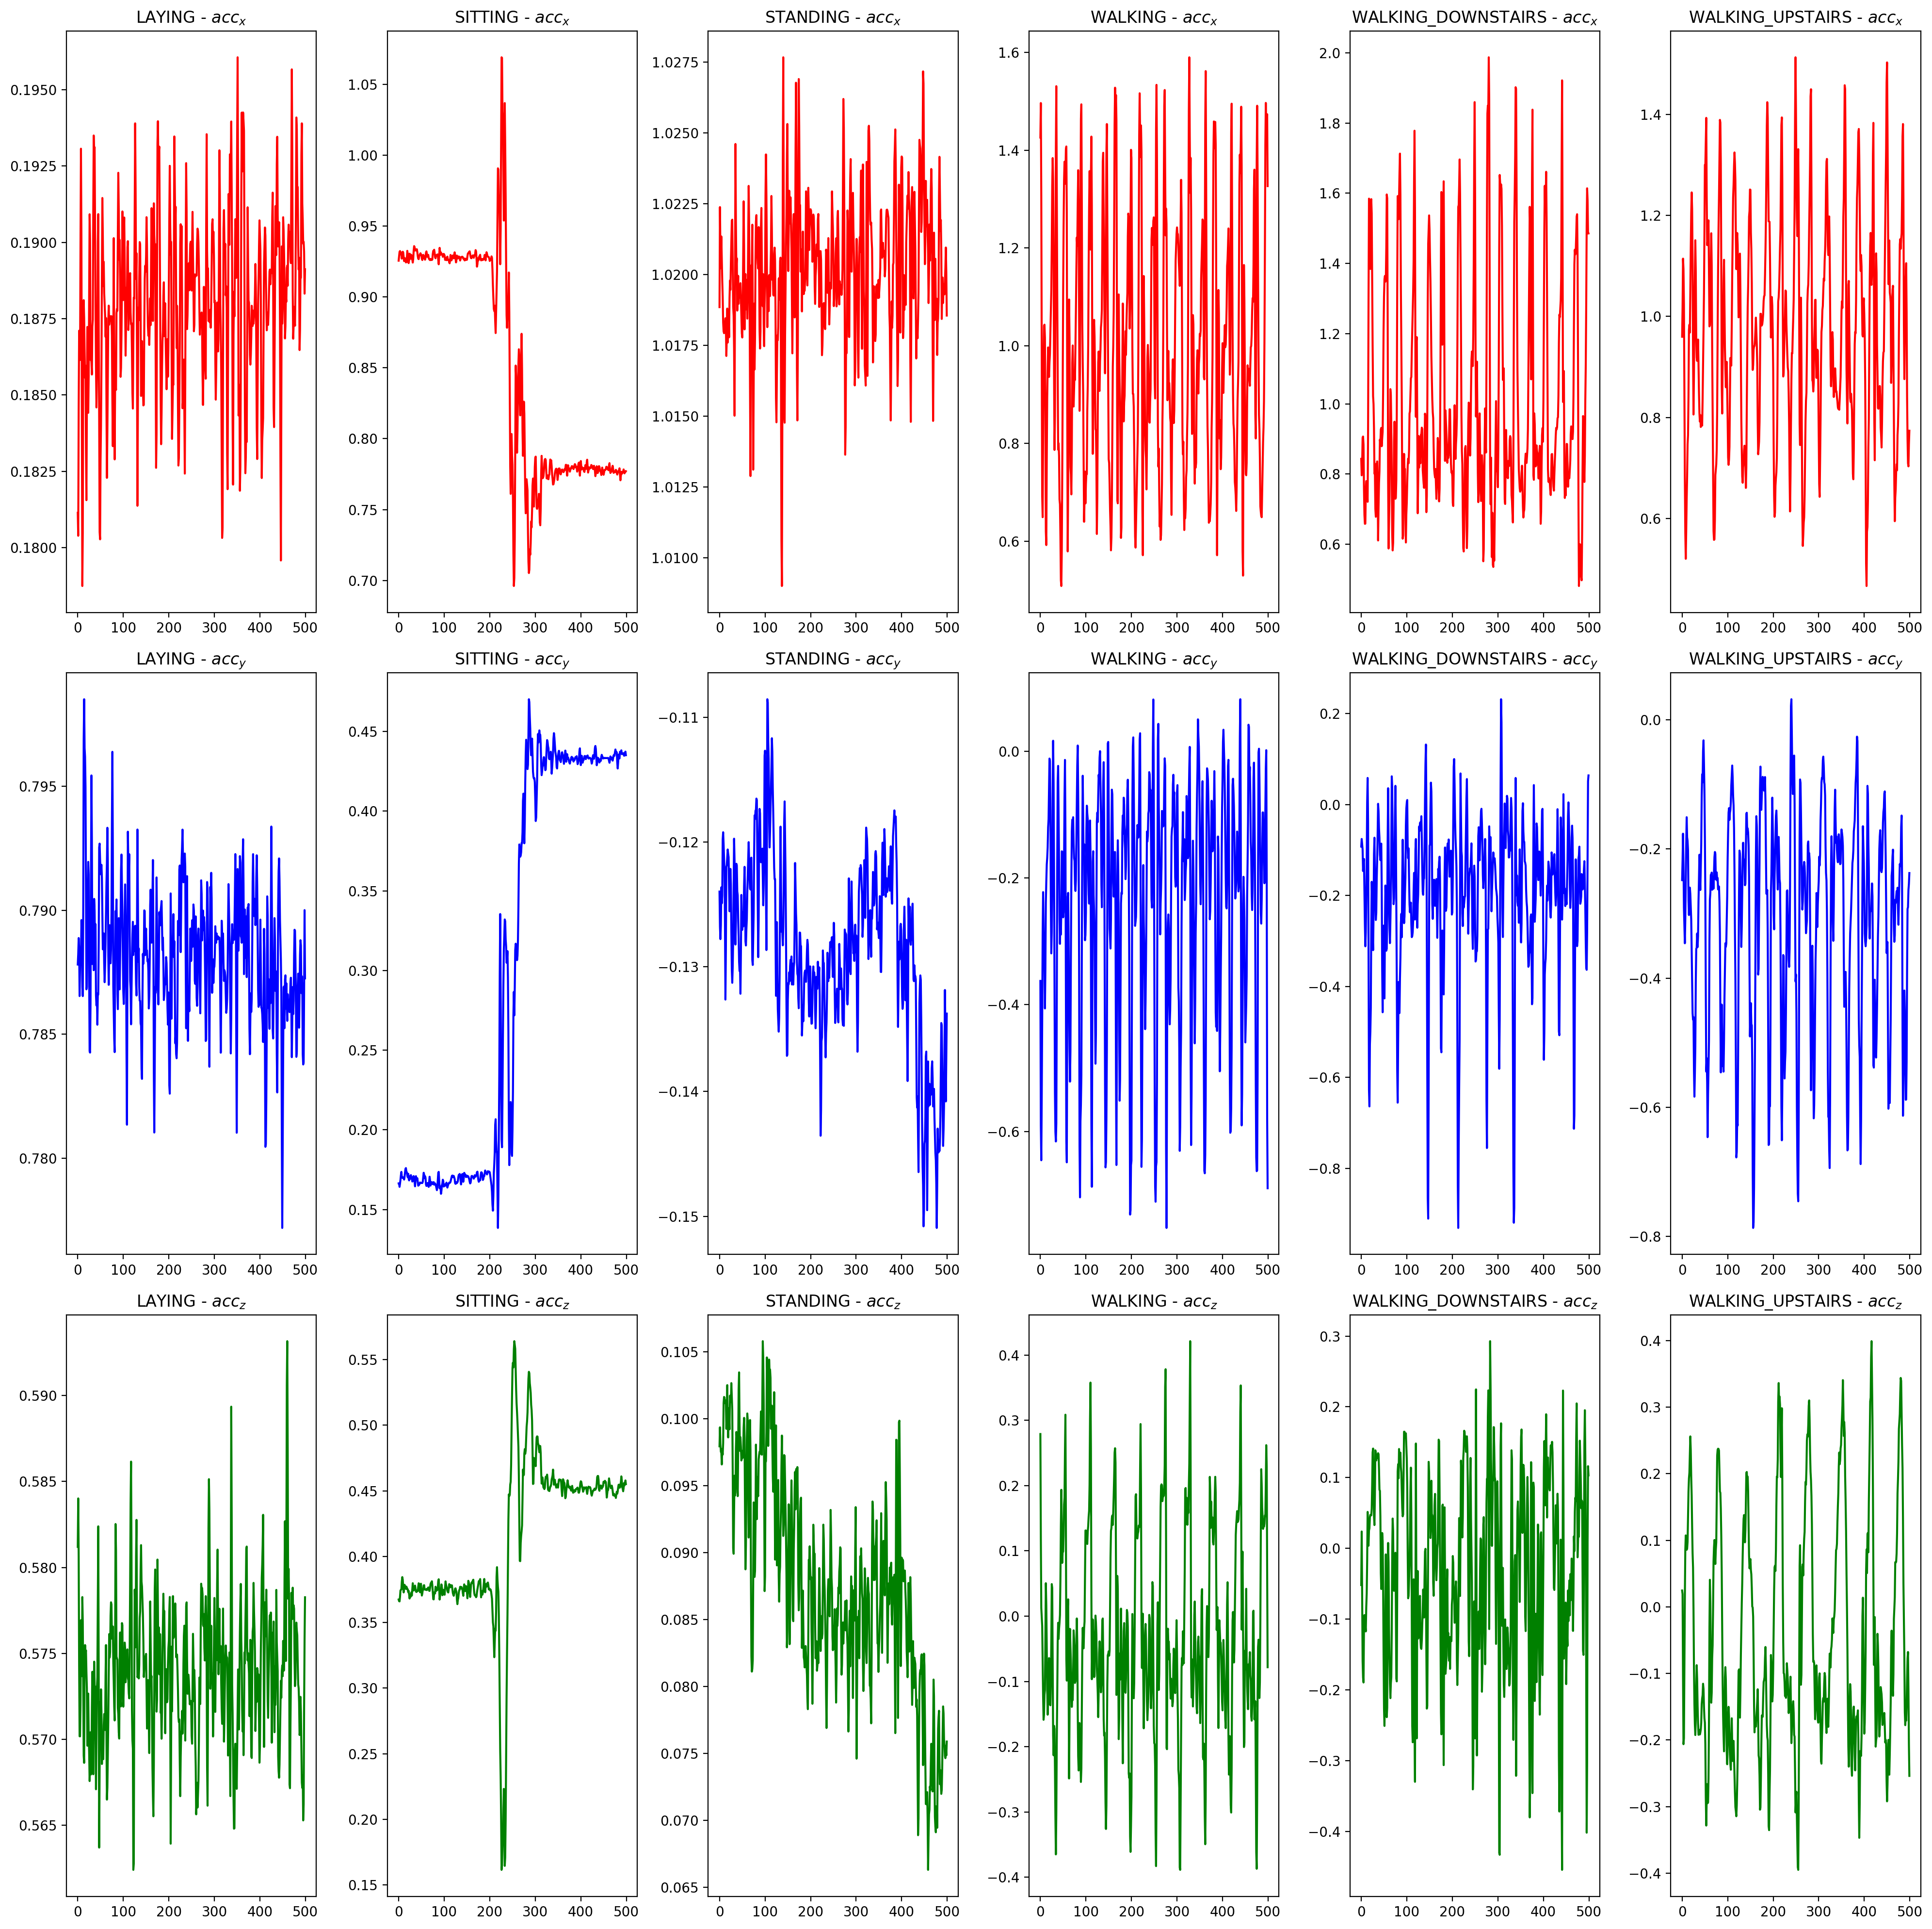

In [4]:
plt.figure(figsize=(20, 20))
axes = ['acc_x', 'acc_y', 'acc_z']
colors = ['r', 'b', 'g']

for i in range(6):
    activity = activities[i]
    data = x_train[i*21]  
    
    for j, (axis, color) in enumerate(zip(axes, colors)):
        plt.subplot(3, 6, i + 1 + j*6)
        plt.plot(np.arange(500), data[:, j], c=color)
        plt.title(f"{activity} - ${axis}$")
plt.tight_layout()
plt.show()

The following were the similaritis/differences observed in the plots:

1. Static activities like laying, sitting and standing show negligibly dyanamic signals nearly being flat, whereas the dyanamic activites like walking, walking upstairs and walking downstairs show repeatitive oscillations.
2. The value of acceleration (in any directions) along the static activities vary largely as for example acc_x vary from 0.18 to 0.19 for laying, 0.15 to 0.55 for sitting and 0.06 to 0.15 for standing, whereas represent a roughly constant range for dyanamic activities from -0.4 to 0.3.

It is easier for the model to distinguish between static and dyanamic class of activities but might be harder for the model to distinguish internally between them.

**Task 1 - Question 2**

For performing the task computing the value of mean total linear acceleration magnitude and the variance to see whether this
itself distinguishes the activities or a machine learning model is needed.


In [5]:
total_acceleration_train = (
    x_train[:,:,0]**2 + x_train[:,:,1]**2 + x_train[:,:,2]**2
)

for i, activity in enumerate(activities):
    acc_mag = total_acceleration_train[i*21]   
    mean_ = acc_mag.mean()
    var_ = acc_mag.var()
    print(f"Activity: {activity}")
    print(f"  Mean total acceleration: {mean_:.4f}")
    print(f"  Variance: {var_:.6f}")


Activity: LAYING
  Mean total acceleration: 0.9860
  Variance: 0.000028
Activity: SITTING
  Mean total acceleration: 1.0156
  Variance: 0.001320
Activity: STANDING
  Mean total acceleration: 1.0651
  Variance: 0.000025
Activity: WALKING
  Mean total acceleration: 1.1896
  Variance: 0.341731
Activity: WALKING_DOWNSTAIRS
  Mean total acceleration: 1.2048
  Variance: 0.658302
Activity: WALKING_UPSTAIRS
  Mean total acceleration: 1.1484
  Variance: 0.229981


From the data:

1. Static activities show less variance in linear acceleration due to less body movements.
2. Dyanamic activities show relatively higher variance in linear acceleration due to more body movements.

Therefore just a threshold value of variance could classify between the two and explicitly a machine learning model is not required for the same.

**Task 1 - Question 3**

Calculating the shape of test and train total linear acceleration.

In [6]:
total_acceleration_test = x_test[:, :, 0]**2 + x_test[:, :, 1]**2 + x_test[:, :, 2]**2


print("Train total acceleration shape:", total_acceleration_train.shape)
print("Test total acceleration shape:", total_acceleration_test.shape)

Train total acceleration shape: (126, 500)
Test total acceleration shape: (54, 500)


Performing PCA on the training and test total acceleration:

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca.fit(total_acceleration_train)

pca_train = pca.transform(total_acceleration_train)        

print("PCA train_total acceleration shape:", pca_train.shape)


PCA train_total acceleration shape: (126, 2)


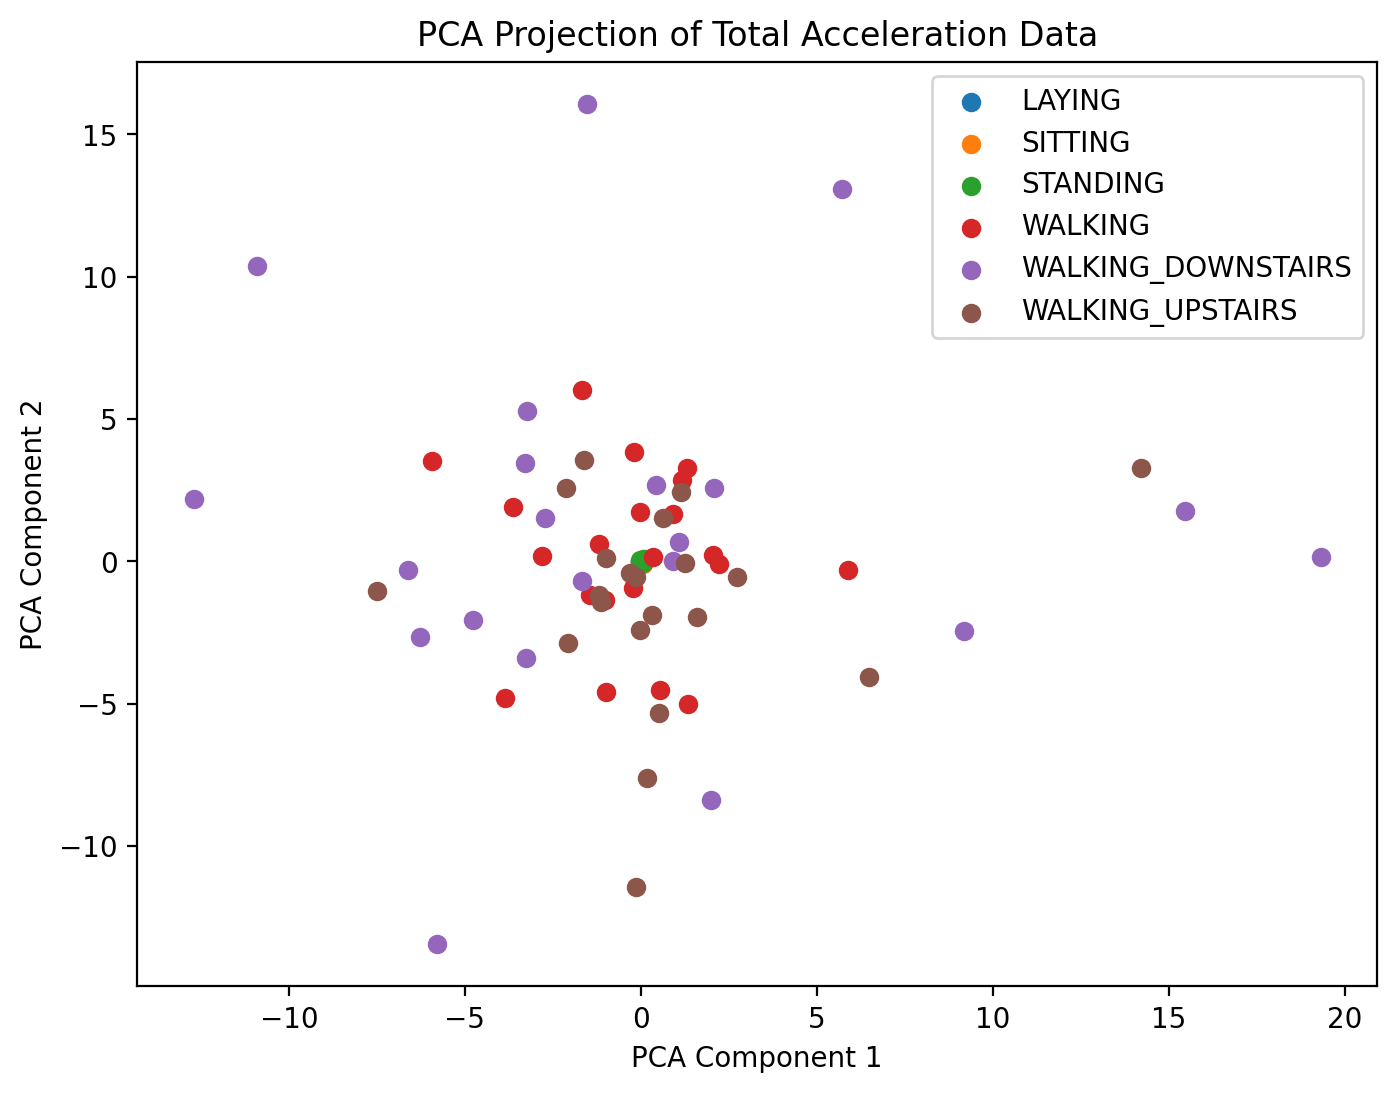

In [8]:
plt.figure(figsize=(8, 6))

for i, activity in enumerate(activities):
    start_idx = i * 21   
    end_idx = (i + 1) * 21
    
    plt.scatter(
        pca_train[start_idx:end_idx, 0],
        pca_train[start_idx:end_idx, 1],
        label=activity
    )

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Total Acceleration Data")
plt.legend()
plt.show()


Using **TSEFL** to create new feautures and then performing PCA on it.

In [9]:
!pip install tsfel

  Using cached tsfel-0.2.0-py3-none-any.whl.metadata (9.4 kB)
  Using cached pandas-2.3.2.tar.gz (4.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [12 lines of output]
      + meson setup C:\Users\borat\AppData\Local\Temp\pip-install-a2uo90_7\pandas_6659c5c7005542ae9c06293e0b8716b7 C:\Users\borat\AppData\Local\Temp\pip-install-a2uo90_7\pandas_6659c5c7005542ae9c06293e0b8716b7\.mesonpy-og1lzd_x -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --vsenv --native-file=C:\Users\borat\AppData\Local\Temp\pip-install-a2uo90_7\pandas_6659c5c7005542ae9c06293e0b8716b7\.mesonpy-og1lzd_x\meson-python-native-file.ini
      The Meson build system
      Version: 1.9.0
      Source dir: C:\Users\borat\AppData\Local\Temp\pip-install-a2uo90_7\pandas_6659c5c7005542ae9c06293e0b8716b7
      Build dir: C:\Users\borat\AppData\Local\Temp\pip-install-a2uo90_7\pandas_6659c5c7005542ae9c06293e0b8716b7\.mesonpy-og1lzd_x
      Build type: native build
      Project name: pandas
      Project version: 2.3.2
      
      ..\meson.

In [10]:
import tsfel
cfg = tsfel.get_features_by_domain()

In [11]:
def extract_features(data, fs = 50):
    tsfel_features = []
    for i in range(len(data)):
        feature = tsfel.time_series_features_extractor(cfg, data[i], fs=50, verbose=0)
        tsfel_features.append(feature.values.flatten())
    
    return tsfel_features


In [12]:
tsfel_features_train=np.array(extract_features(total_acceleration_train))
tsfel_features_test=np.array(extract_features(total_acceleration_test))

print(tsfel_features_train.shape)
print(tsfel_features_test.shape)

(126, 156)
(54, 156)


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca.fit(tsfel_features_train)
tsfel_pca_data = pca.transform(tsfel_features_train)
tsfel_pca_data.shape

(126, 2)

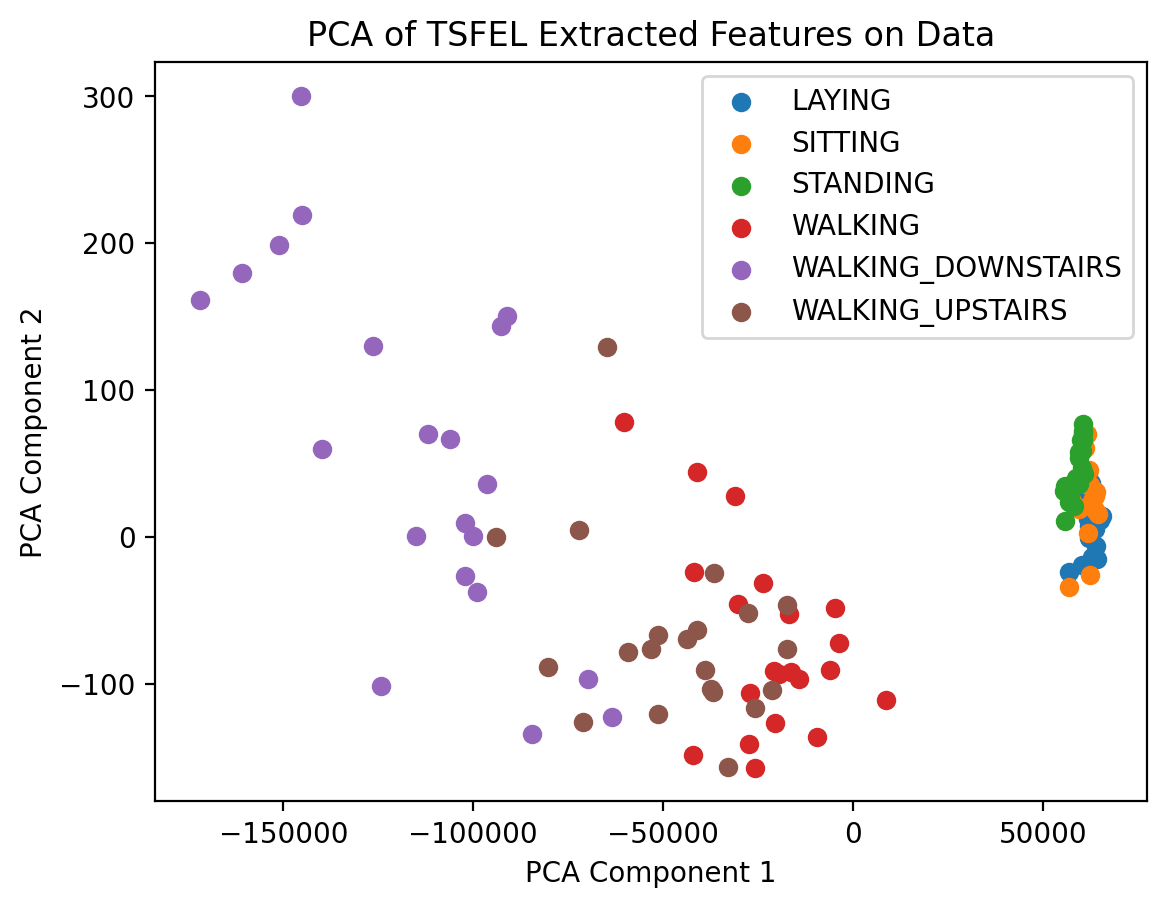

In [14]:
for i in range(len(activities)):
    activity = activities[i]
    plt.scatter(tsfel_pca_data[i*21:(i+1)*21,0], tsfel_pca_data[i*21:(i+1)*21,1], label=activity)
    
plt.legend()
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of TSFEL Extracted Features on Data")
plt.show()    

**Performing PCA on the features provided by the dataset to obtain two features from it.**

In [15]:
X_train_features = np.loadtxt('UCI HAR Dataset/train/X_train.txt')
print(X_train_features.shape)

y_train_features = np.loadtxt('UCI HAR Dataset/train/y_train.txt')
print(y_train_features.shape)

(7352, 561)
(7352,)


In [16]:
pca = PCA(n_components=2, random_state=42)
pca.fit(X_train_features)
X_train_pca_data = pca.transform(X_train_features)
X_train_pca_data.shape

(7352, 2)

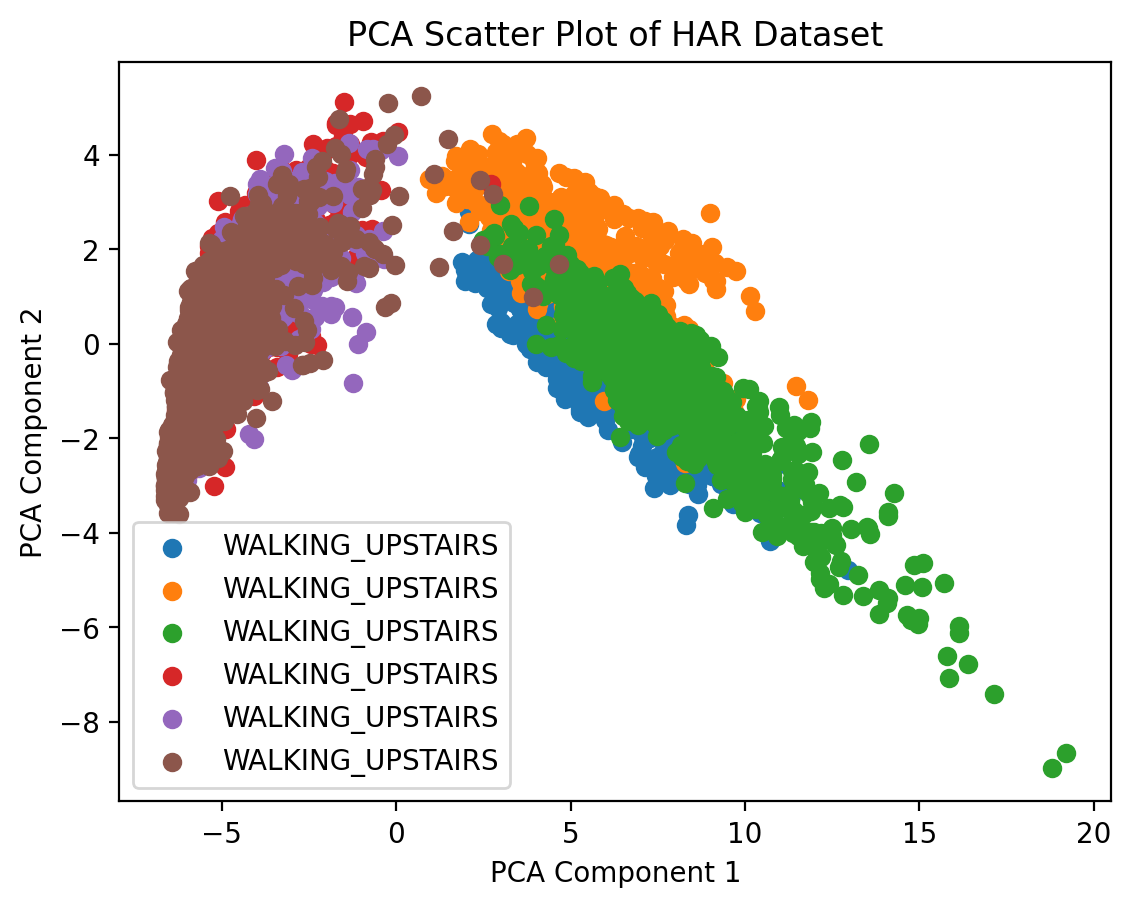

In [17]:
for i in range(1, 7):
    plt.scatter(
        X_train_pca_data[y_train_features == i, 0],
        X_train_pca_data[y_train_features == i, 1],
        label=activity
    )

plt.legend()
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Scatter Plot of HAR Dataset")
plt.show()


Following were the observations noted after plotting the all three plots:

1. PCA on total acceleration was have activities overlapping and more scattered. No such clusters were formed.
2. PCA on the TSFEL features have clearer distinction between the static and dyanamic group of activities but posses some internal overlapping for dyanamic activities.
3. PCA on dataset features gave clear separations among the activities internally as well, where activities are forming different clusters.

**Task 1 - Question 4**

In [18]:
import pandas as pd

sample_features = tsfel.time_series_features_extractor(cfg, total_acceleration_train[0], verbose=0)
tsfel_feature_names = sample_features.columns

tsfel_features_train_df = pd.DataFrame(tsfel_features_train, columns=tsfel_feature_names)
tsfel_features_train_df.columns = tsfel_features_train_df.columns.str.replace(r"^0_", "", regex=True)

tsfel_corr = tsfel_features_train_df.corr()
tsfel_corr

C:\Users\borat\AppData\Local\Temp\ipykernel_53324\681775531.py:3: UserWarning: Using default sampling frequency set in configuration file.
  sample_features = tsfel.time_series_features_extractor(cfg, total_acceleration_train[0], verbose=0)


Absolute energy  Area under the curve  \
Absolute energy                 1.000000              0.958144   
Area under the curve            0.958144              1.000000   
Autocorrelation                -0.074475             -0.091031   
Average power                   1.000000              0.958144   
Centroid                        0.193766              0.157284   
...                                  ...                   ...   
Wavelet variance_2.5Hz          0.974545              0.887853   
Wavelet variance_3.12Hz         0.971304              0.875166   
Wavelet variance_4.17Hz         0.966689              0.862845   
Wavelet variance_6.25Hz         0.957283              0.868481   
Zero crossing rate                   NaN                   NaN   

                         Autocorrelation  Average power  Centroid  \
Absolute energy                -0.074475       1.000000  0.193766   
Area under the curve           -0.091031       0.958144  0.157284   
Autocorrelation                 1.000000      -0.074475 -0.030978   
Average power                  -0.074475       1.000000  0.193766   
Centroid                       -0.030978       0.193766  1.000000   
...                                  ...            ...       ...   
Wavelet variance_2.5Hz         -0.058641       0.974545  0.219700   
Wavelet variance_3.12Hz        -0.058747       0.971304  0.212616   
Wavelet variance_4.17Hz        -0.060505       0.966689  0.202888   
Wavelet variance_6.25Hz        -0.068533       0.957283  0.152745   
Zero crossing rate                   NaN            NaN       NaN   

                         ECDF Percentile Count_0  ECDF Percentile Count_1  \
Absolute energy                              NaN                      NaN   
Area under the curve                         NaN                      NaN   
Autocorrelation                              NaN                      NaN   
Average power                                NaN                      NaN   
Centroid                                     NaN                      NaN   
...                                          ...                      ...   
Wavelet variance_2.5Hz                       NaN                      NaN   
Wavelet variance_3.12Hz                      NaN                      NaN   
Wavelet variance_4.17Hz                      NaN                      NaN   
Wavelet variance_6.25Hz                      NaN                      NaN   
Zero crossing rate                           NaN                      NaN   

                         ECDF Percentile_0  ECDF Percentile_1  ECDF_0  ...  \
Absolute energy                  -0.926880           0.961725     NaN  ...   
Area under the curve             -0.928568           0.964871     NaN  ...   
Autocorrelation                   0.057230          -0.068681     NaN  ...   
Average power                    -0.926880           0.961725     NaN  ...   
Centroid                         -0.170841           0.206578     NaN  ...   
...                                    ...                ...     ...  ...   
Wavelet variance_2.5Hz           -0.879711           0.928454     NaN  ...   
Wavelet variance_3.12Hz          -0.860440           0.912485     NaN  ...   
Wavelet variance_4.17Hz          -0.840875           0.888402     NaN  ...   
Wavelet variance_6.25Hz          -0.840667           0.865245     NaN  ...   
Zero crossing rate                     NaN                NaN     NaN  ...   

                         Wavelet variance_1.39Hz  Wavelet variance_1.56Hz  \
Absolute energy                         0.941081                 0.969189   
Area under the curve                    0.883263                 0.902638   
Autocorrelation                        -0.060595                -0.060720   
Average power                           0.941081                 0.969189   
Centroid                                0.243126                 0.254164   
...                                          ...                      ...   
Wa

In [19]:
features = np.loadtxt('UCI HAR Dataset/features.txt', dtype=str)
features = features[:, 1]  

dataset_features_train_df = pd.DataFrame(X_train_features, columns=features)


dataset_corr = dataset_features_train_df.corr()
dataset_corr 

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  \
tBodyAcc-mean()-X                              1.000000           0.148061   
tBodyAcc-mean()-Y                              0.148061           1.000000   
tBodyAcc-mean()-Z                             -0.256952          -0.078769   
tBodyAcc-std()-X                               0.000619          -0.045160   
tBodyAcc-std()-Y                              -0.021903          -0.044920   
...                                                 ...                ...   
angle(tBodyGyroMean,gravityMean)               0.037444           0.017967   
angle(tBodyGyroJerkMean,gravityMean)           0.028844           0.075679   
angle(X,gravityMean)                          -0.035257          -0.005309   
angle(Y,gravityMean)                           0.034371           0.001053   
angle(Z,gravityMean)                           0.028242          -0.013903   

                                      tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
tBodyAcc-mean()-X                             -0.256952          0.000619   
tBodyAcc-mean()-Y                             -0.078769         -0.045160   
tBodyAcc-mean()-Z                              1.000000         -0.020217   
tBodyAcc-std()-X                              -0.020217          1.000000   
tBodyAcc-std()-Y                              -0.016641          0.927461   
...                                                 ...               ...   
angle(tBodyGyroMean,gravityMean)              -0.063609          0.018985   
angle(tBodyGyroJerkMean,gravityMean)          -0.034037         -0.024810   
angle(X,gravityMean)                           0.008587         -0.371653   
angle(Y,gravityMean)                          -0.015288          0.471065   
angle(Z,gravityMean)                          -0.022643          0.394825   

                                      tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
tBodyAcc-mean()-X                            -0.021903         -0.044617   
tBodyAcc-mean()-Y                            -0.044920         -0.049746   
tBodyAcc-mean()-Z                            -0.016641         -0.008410   
tBodyAcc-std()-X                              0.927461          0.851668   
tBodyAcc-std()-Y                              1.000000          0.895510   
...                                                ...               ...   
angle(tBodyGyroMean,gravityMean)             -0.008507         -0.018429   
angle(tBodyGyroJerkMean,gravityMean)         -0.014592         -0.006471   
angle(X,gravityMean)                         -0.380531         -0.345011   
angle(Y,gravityMean)                          0.523600          0.476006   
angle(Z,gravityMean)                          0.433169          0.482828   

                                      tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
tBodyAcc-mean()-X                             0.006290         -0.022754   
tBodyAcc-mean()-Y                            -0.044180         -0.045049   
tBodyAcc-mean()-Z                            -0.018747         -0.015203   
tBodyAcc-std()-X                              0.998632          0.920888   
tBodyAcc-std()-Y                              0.922803          0.997347   
...                                                ...               ...   
angle(tBodyGyroMean,gravityMean)              0.019389         -0.012546   
angle(tBodyGyroJerkMean,gravityMean)         -0.024951         -0.012341   
angle(X,gravityMean)                         -0.368191         -0.377025   
angle(Y,gravityMean)                          0.466424          0.525081   
angle(Z,gravityMean)                          0.390922          0.431459   

                                      tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
tBodyAcc-mean()-X                            -0.047558          0.044062  ...   
tBodyAcc-mean()-Y                            -0.050402         -0.038108  ...   
tBodyAcc-mean()-Z                            -0.001988         -0.037197  ...   
tBodyAcc-std()-X          

In [20]:
threshold = 0.95

corr_matrix_tsfel = tsfel_features_train_df.corr()
upper_tsfel = corr_matrix_tsfel.where(np.triu(np.ones(corr_matrix_tsfel.shape), k=1).astype(bool))

high_corr_tsfel = [column for column in upper_tsfel.columns if any(upper_tsfel[column].abs() > threshold)]

print("Highly correlated TSFEL features (possible redundancy):")
print(high_corr_tsfel)

Highly correlated TSFEL features (possible redundancy):
['Area under the curve', 'Average power', 'ECDF Percentile_1', 'Human range energy', 'Interquartile range', 'LPCC_0', 'LPCC_10', 'LPCC_11', 'LPCC_2', 'LPCC_4', 'LPCC_5', 'LPCC_6', 'LPCC_7', 'LPCC_8', 'LPCC_9', 'MFCC_0', 'Max', 'Mean', 'Mean absolute deviation', 'Mean absolute diff', 'Median absolute deviation', 'Median absolute diff', 'Median frequency', 'Min', 'Peak to peak distance', 'Positive turning points', 'Root mean square', 'Signal distance', 'Spectral centroid', 'Spectral distance', 'Spectral entropy', 'Spectral kurtosis', 'Spectral roll-off', 'Spectral skewness', 'Spectral slope', 'Spectral spread', 'Spectrogram mean coefficient_1.61Hz', 'Standard deviation', 'Sum absolute diff', 'Variance', 'Wavelet absolute mean_1.56Hz', 'Wavelet absolute mean_1.79Hz', 'Wavelet absolute mean_2.08Hz', 'Wavelet absolute mean_2.5Hz', 'Wavelet absolute mean_3.12Hz', 'Wavelet absolute mean_4.17Hz', 'Wavelet absolute mean_6.25Hz', 'Wavelet e

In [21]:
corr_matrix_dataset = dataset_features_train_df.corr()
upper_dataset = corr_matrix_dataset.where(np.triu(np.ones(corr_matrix_dataset.shape), k=1).astype(bool))
high_corr_dataset = [column for column in upper_dataset.columns if any(upper_dataset[column].abs() > threshold)]

print("\nHighly correlated dataset features (possible redundancy):")
print(high_corr_dataset)


Highly correlated dataset features (possible redundancy):
['tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tGravityAcc-mad()-X', 'tGravityAcc-mad()-Y', 'tGravityAcc-mad()-Z', 'tGravityAcc-max()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-max()-Z', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z', 'tGravityAcc-energy()-X', 'tGravityAcc-iqr()-X', 'tGravityAcc-iqr()-Y', 'tGravityAcc-iqr()-Z', 'tGravityAcc-arCoeff()-X,2', 'tGravityAcc-arCoeff()-X,3', 'tGravityAcc-arCoeff()-X,4', 'tGravityAcc-arCoeff()-Y,2', 'tGravityAcc-arCoeff()-Y,3', 'tGravityAcc-arCoeff()-Y,4', 'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-arCoeff()-Z,3', 'tGravityAcc-arCoeff()-Z,4', 'tBodyAccJerk-std()-X', 'tBodyAccJerk-std()-Y', 'tBodyAccJerk-mad()-X', 'tBodyAccJerk-mad()-Y', 'tBodyAccJerk-mad()-Z', 'tBodyAccJerk-ma

**Task 2 - Question 1**

**Importing necessary libraries**

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

**Decision tree model using the raw accelerometer data**

Decision Tree Performance Metrics:
Accuracy   : 0.5185
Precision  : 0.5093
Recall     : 0.5185
F1 Score   : 0.4992


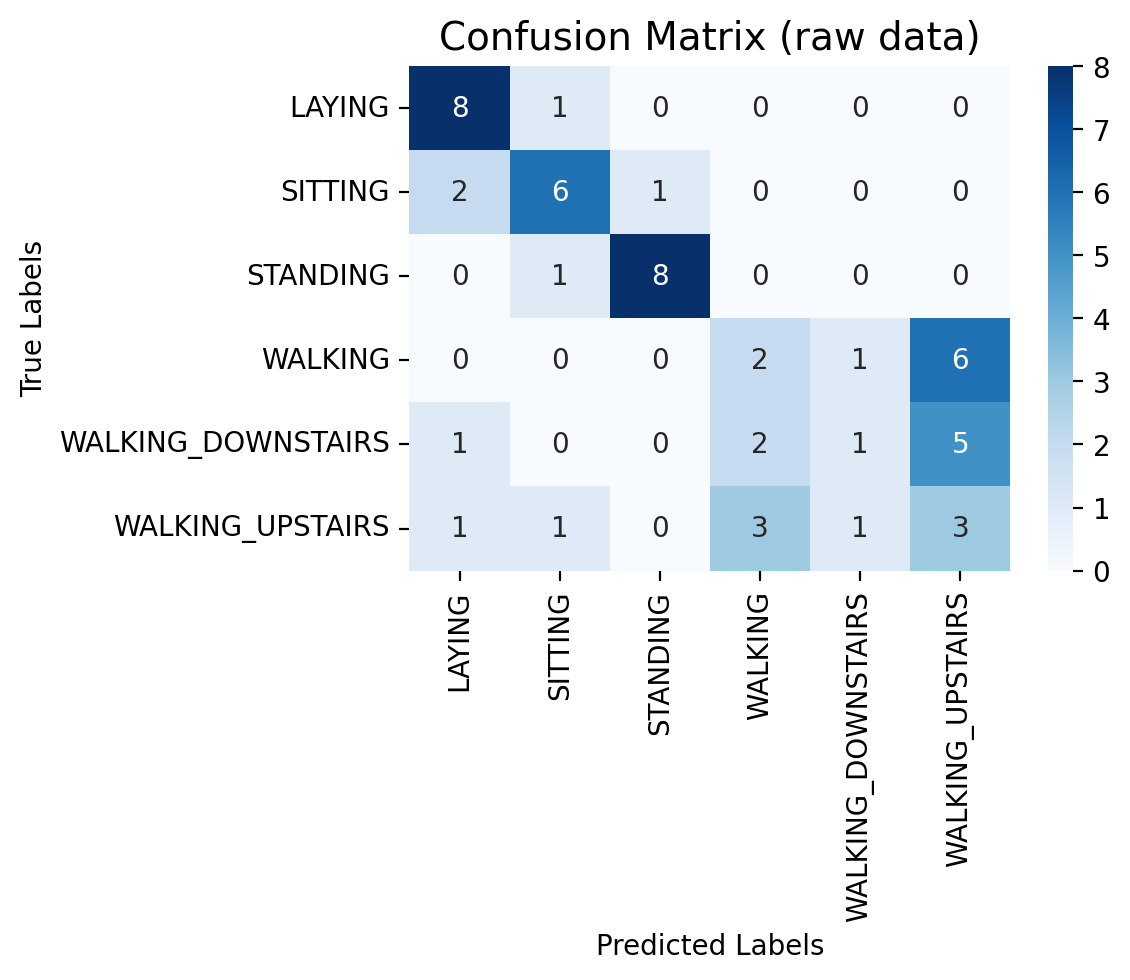

In [23]:
decision_tree_raw_data = DecisionTreeClassifier()   
decision_tree_raw_data.fit(total_acceleration_train, y_train)

y_pred_dt = decision_tree_raw_data.predict(total_acceleration_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Performance Metrics:")
print(f"Accuracy   : {dt_accuracy:.4f}")
print(f"Precision  : {dt_precision:.4f}")
print(f"Recall     : {dt_recall:.4f}")
print(f"F1 Score   : {dt_f1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, xticklabels=activities, yticklabels=activities, cmap='Blues')
plt.title('Confusion Matrix (raw data)', fontsize=14)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

**Decision Tree Model using the TSFEL data**

 TSFEL Features - Decision Tree Performance Metrics:
Accuracy   : 0.7593
Precision  : 0.7667
Recall     : 0.7593
F1 Score   : 0.7602


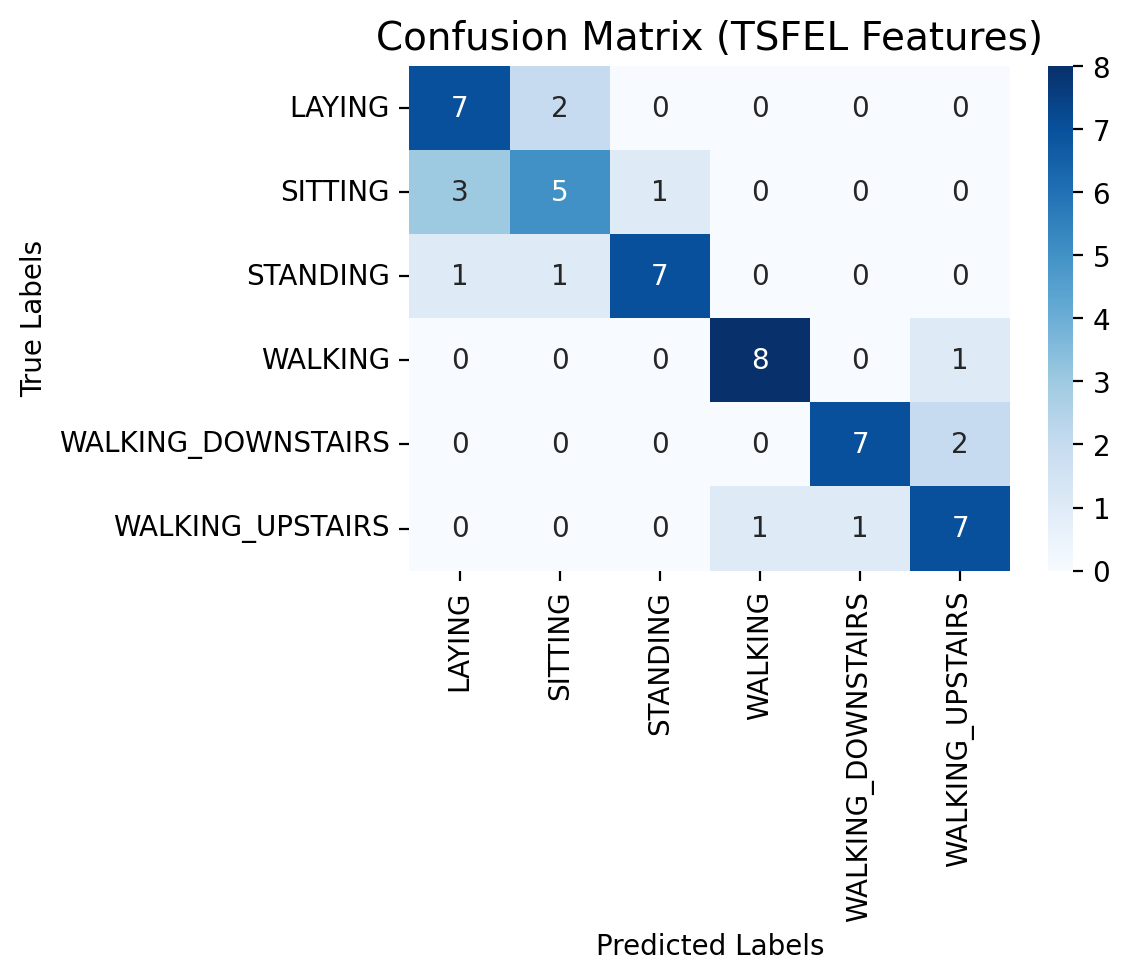

In [24]:
tsfel_decision_tree = DecisionTreeClassifier()   
tsfel_decision_tree.fit(tsfel_features_train, y_train)

y_pred_tsfel = tsfel_decision_tree.predict(tsfel_features_test)

tsfel_accuracy = accuracy_score(y_test, y_pred_tsfel)
tsfel_precision = precision_score(y_test, y_pred_tsfel, average='weighted')
tsfel_recall = recall_score(y_test, y_pred_tsfel, average='weighted')
tsfel_f1 = f1_score(y_test, y_pred_tsfel, average='weighted')

print(" TSFEL Features - Decision Tree Performance Metrics:")
print(f"Accuracy   : {tsfel_accuracy:.4f}")
print(f"Precision  : {tsfel_precision:.4f}")
print(f"Recall     : {tsfel_recall:.4f}")
print(f"F1 Score   : {tsfel_f1:.4f}")

conf_matrix_tsfel = confusion_matrix(y_test, y_pred_tsfel)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_tsfel, annot=True, xticklabels=activities, yticklabels=activities, cmap='Blues')
plt.title('Confusion Matrix (TSFEL Features)', fontsize=14)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

**Decision Tree Model using features provided in the dataset**

Loading the test dataset:

In [25]:
X_test_features = np.loadtxt('UCI HAR Dataset/test/X_test.txt')
print(X_test_features.shape)

y_test_features = np.loadtxt('UCI HAR Dataset/test/y_test.txt')
print(y_test_features.shape)

(2947, 561)
(2947,)


Forming the Decision Tree

Extracted Features - Decision Tree Performance Metrics:
Accuracy   : 0.8582
Precision  : 0.8587
Recall     : 0.8582
F1 Score   : 0.8576


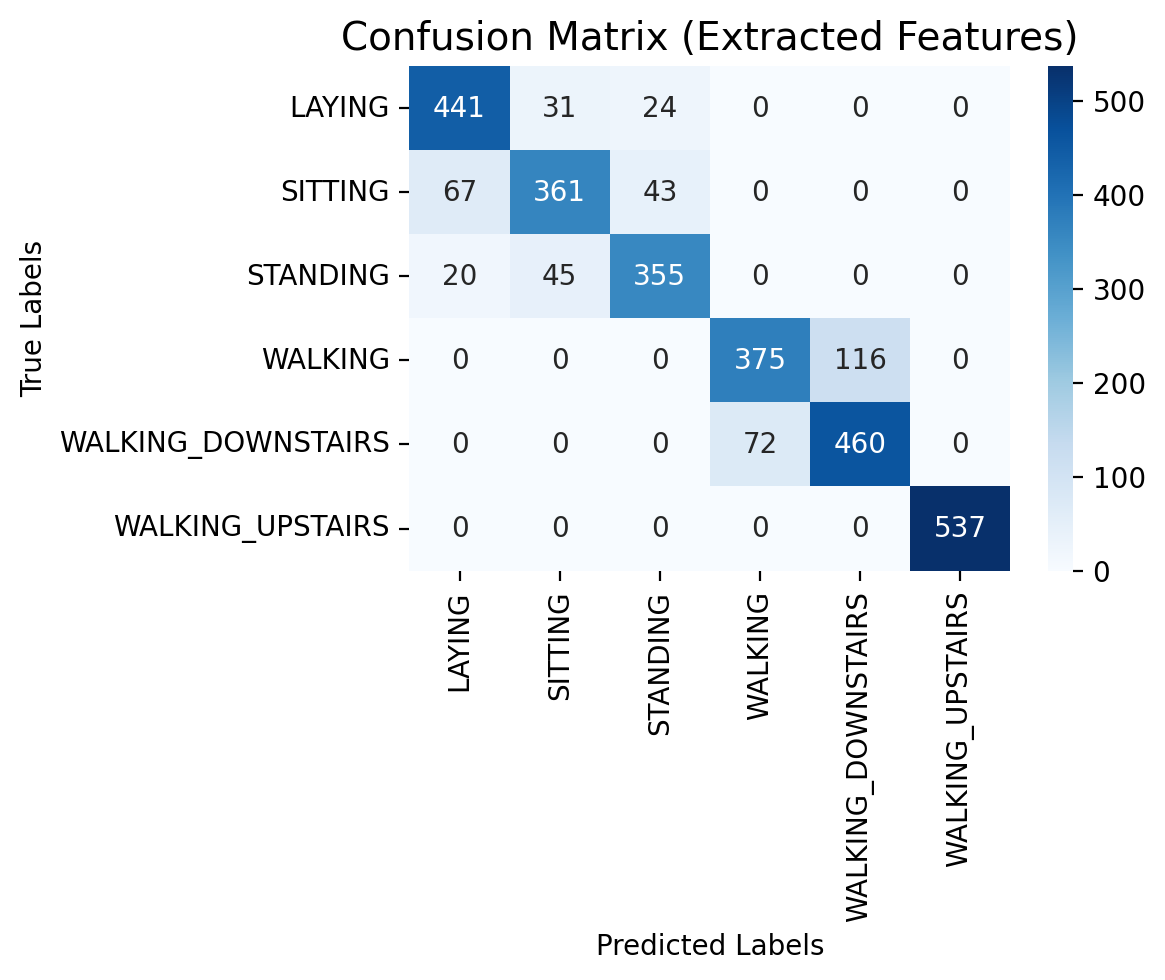

In [26]:
data_features_decision_tree = DecisionTreeClassifier()   
data_features_decision_tree.fit(X_train_features, y_train_features)

y_pred_features = data_features_decision_tree.predict(X_test_features)

features_accuracy = accuracy_score(y_test_features, y_pred_features)
features_precision = precision_score(y_test_features, y_pred_features, average='weighted')
features_recall = recall_score(y_test_features, y_pred_features, average='weighted')
features_f1 = f1_score(y_test_features, y_pred_features, average='weighted')

print("Extracted Features - Decision Tree Performance Metrics:")
print(f"Accuracy   : {features_accuracy:.4f}")
print(f"Precision  : {features_precision:.4f}")
print(f"Recall     : {features_recall:.4f}")
print(f"F1 Score   : {features_f1:.4f}")

conf_matrix_features = confusion_matrix(y_test_features, y_pred_features)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_features, annot=True, fmt='d', xticklabels=activities, yticklabels=activities, cmap='Blues')
plt.title('Confusion Matrix (Extracted Features)', fontsize=14)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

The accuracies acheived of the three models are as follows:

1. Decision tree on raw accelerometer data - 0.5185
2. Decision tree on TSFEL features data - 0.7593
3. Decision tree on data features - 0.8582

Therefore, based on accuracy as well as other listed metric the best model to use is the one trained on the dataset features.

**Task 2  - Question 2**

Training the all three decison tree models with varying depths.


Results for Raw Accelerometer Data:
Depth 2 : Accuracy = 0.4074
Depth 3 : Accuracy = 0.4630
Depth 4 : Accuracy = 0.5370
Depth 5 : Accuracy = 0.5556
Depth 6 : Accuracy = 0.5185
Depth 7 : Accuracy = 0.5185
Depth 8 : Accuracy = 0.5185

Results for TSFEL Features:
Depth 2 : Accuracy = 0.5926
Depth 3 : Accuracy = 0.7593
Depth 4 : Accuracy = 0.7407
Depth 5 : Accuracy = 0.7222
Depth 6 : Accuracy = 0.7222
Depth 7 : Accuracy = 0.7222
Depth 8 : Accuracy = 0.7222

Results for Provided Features:
Depth 2 : Accuracy = 0.5310
Depth 3 : Accuracy = 0.7224
Depth 4 : Accuracy = 0.8096
Depth 5 : Accuracy = 0.8385
Depth 6 : Accuracy = 0.8551
Depth 7 : Accuracy = 0.8639
Depth 8 : Accuracy = 0.8707


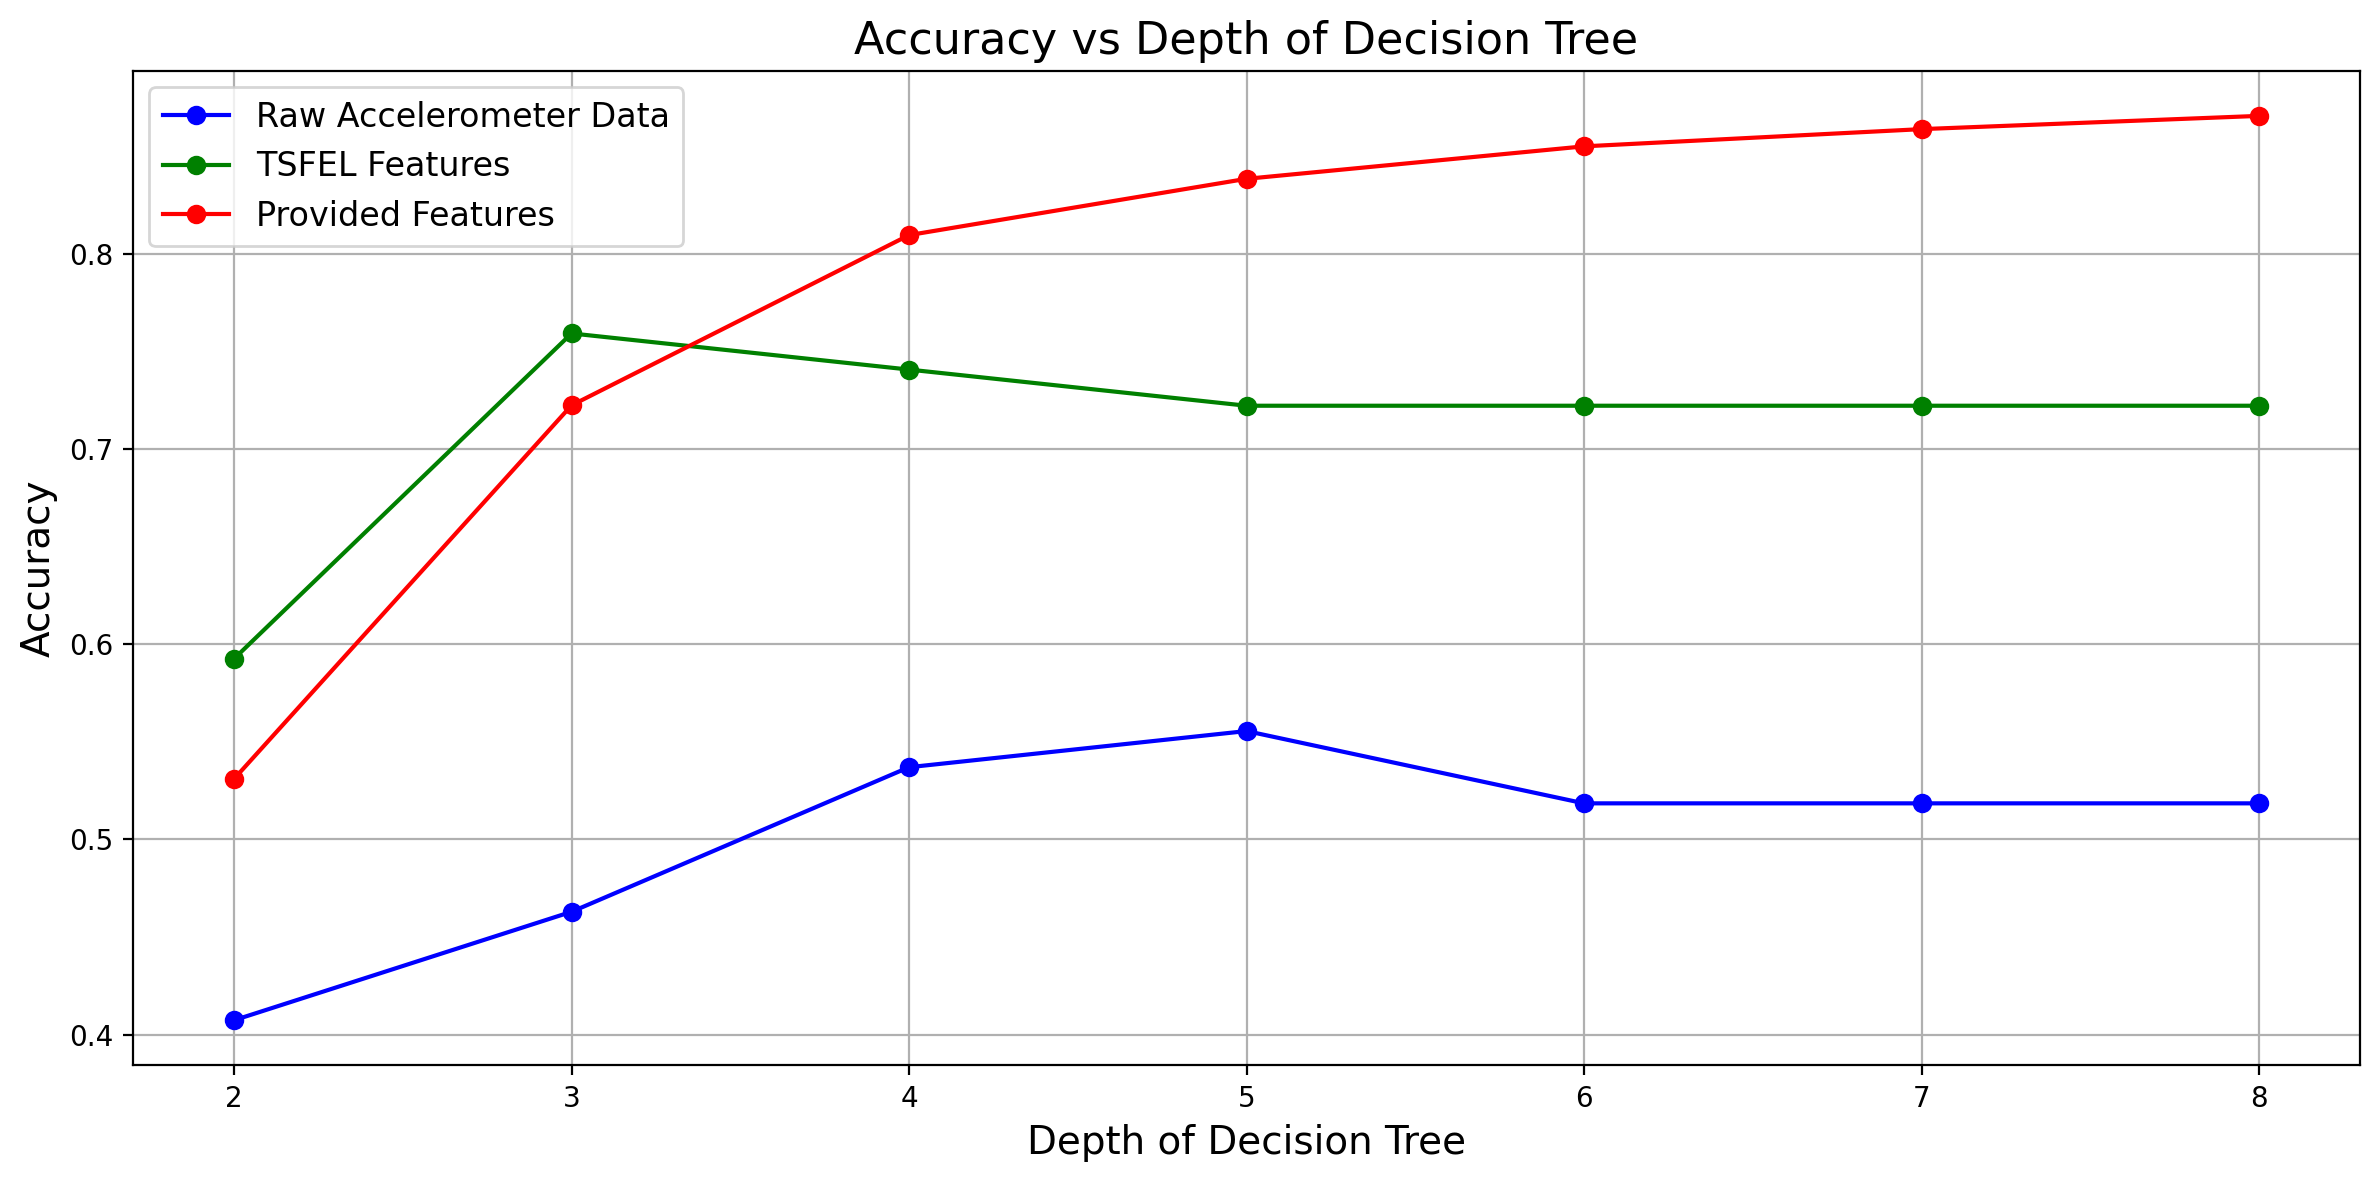

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depths = range(2, 9)

accuracies_raw = []
accuracies_tsfel = []
accuracies_features = []

def evaluate_dt(X_train, y_train, X_test, y_test, depths, label):
    acc_list = []
    print(f"\nResults for {label}:")
    for depth in depths:
        model = DecisionTreeClassifier(max_depth=depth, random_state=0)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        print(f"Depth {depth:<2}: Accuracy = {acc:.4f}")
        acc_list.append(acc)
    return acc_list

accuracies_raw = evaluate_dt(total_acceleration_train, y_train, total_acceleration_test, y_test, depths, "Raw Accelerometer Data")
accuracies_tsfel = evaluate_dt(tsfel_features_train, y_train, tsfel_features_test, y_test, depths, "TSFEL Features")
accuracies_features = evaluate_dt(X_train_features, y_train_features, X_test_features, y_test_features, depths, "Provided Features")

plt.figure(figsize=(12, 6))
plt.plot(depths, accuracies_raw, marker='o', linestyle='-', color='b', label='Raw Accelerometer Data')
plt.plot(depths, accuracies_tsfel, marker='o', linestyle='-', color='g', label='TSFEL Features')
plt.plot(depths, accuracies_features, marker='o', linestyle='-', color='r', label='Provided Features')

plt.xlabel('Depth of Decision Tree', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy vs Depth of Decision Tree', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


**Task 2 - Question 3**

1. Model trained using Raw Accelerometer Data:

The model trained using raw accelerometer data performs poorly compared to the other two models. From the confusion matrix, we can observe that it struggles significantly to distinguish between dynamic activities like walking, walking upstairs and walking downstairs, with frequent misclassifications among these activities. It also faces confusion between static activities like laying and sitting. This is because the raw accelerometer data has limited features, causing the model to underfit and lack the discriminative power needed to capture subtle differences between similar activities.

2. Model trained using TSFEL Features:

The model trained using TSFEL features performs well despite the small dataset size. It demonstrates superior classification ability across all activity types, with minimal confusion between classes. The model performs good in distinguishing dynamic activities and shows only slight confusion between similar static activities. This performance is because TSFEL features, derived through automated feature extraction processes, provide a comprehensive set of distinctive temporal and statistical characteristics that enable precise differentiation between various human activities.

3. Model trained on Extracted Features Dataset:

The model trained using extracted features from the larger dataset performs very well overall, achieving excellent results for most activities including perfect classification for walking upstairs. However, it faces some confusion between static activities and moderate confusion among walking variants. Despite having a significantly larger training dataset, its performance is comparable to the TSFEL model, indicating that quality feature can be as effective as large data volumes for activity recognition tasks.

**Task 3 - Question 1**

Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision, recall and confusion matrix of the model. You have three version of UCI dataset you can use a)Raw data from accelerometer, b)TSFEL featurised data, c)Features provided by author. Choose which version to use, ensuring that your test data is similar to your training data. How did the model perform? [1 marks]

In [28]:
import os
print(os.getcwd())


c:\Users\borat\OneDrive\Desktop\DS & ML\Human_Activity_Recognition\ES-335--Assignment-1\HAR


In [67]:
root_dir = "Recorded_dataset"

labels = {
    "Walking": 1,
    "Walking_Upstairs": 2,
    "Walking_Downstairs": 3,
    "Sitting": 4,
    "Standing": 5,
    "Laying": 6
}


X_train = []


X_total_acceleration = []

data_array_list = []
y_data = []
for subject in os.listdir(root_dir):
    subject_dir = os.path.join(root_dir, subject)
    for activity in os.listdir(subject_dir):
        activity_dir = os.path.join(subject_dir, activity)

        file_path1 = os.path.join(activity_dir, 'accelerometer1.csv')

        df1 = pd.read_csv(file_path1)
        X_train.append(df1.values[250:750][:, 1:4])
        X_total_acceleration.append(df1.values[250:750][:, 4])

        activity = activity.upper()
        y_data.append(activity)



X_train = np.array(X_train)
y_data = np.array(y_data)
X_total_acceleration = np.array(X_total_acceleration)
print("Shape of X_data:", X_train.shape)
print("Shape of y_data:", y_data.shape)
print("Shape of X_total_acceleration:", X_total_acceleration.shape)

Shape of X_data: (24, 500, 3)
Shape of y_data: (24,)
Shape of X_total_acceleration: (24, 500)


In [30]:
def preprocess_data(data):
    # Check for NaN values
    if np.any(np.isnan(data)):
        print("Data contains NaN values. Filling NaN values with 0.")
        data = np.nan_to_num(data)
    else:
        print("Data does not contain NaN values.")
    return data

X_train = preprocess_data(X_train)



Data does not contain NaN values.


## Visuliazing the Data


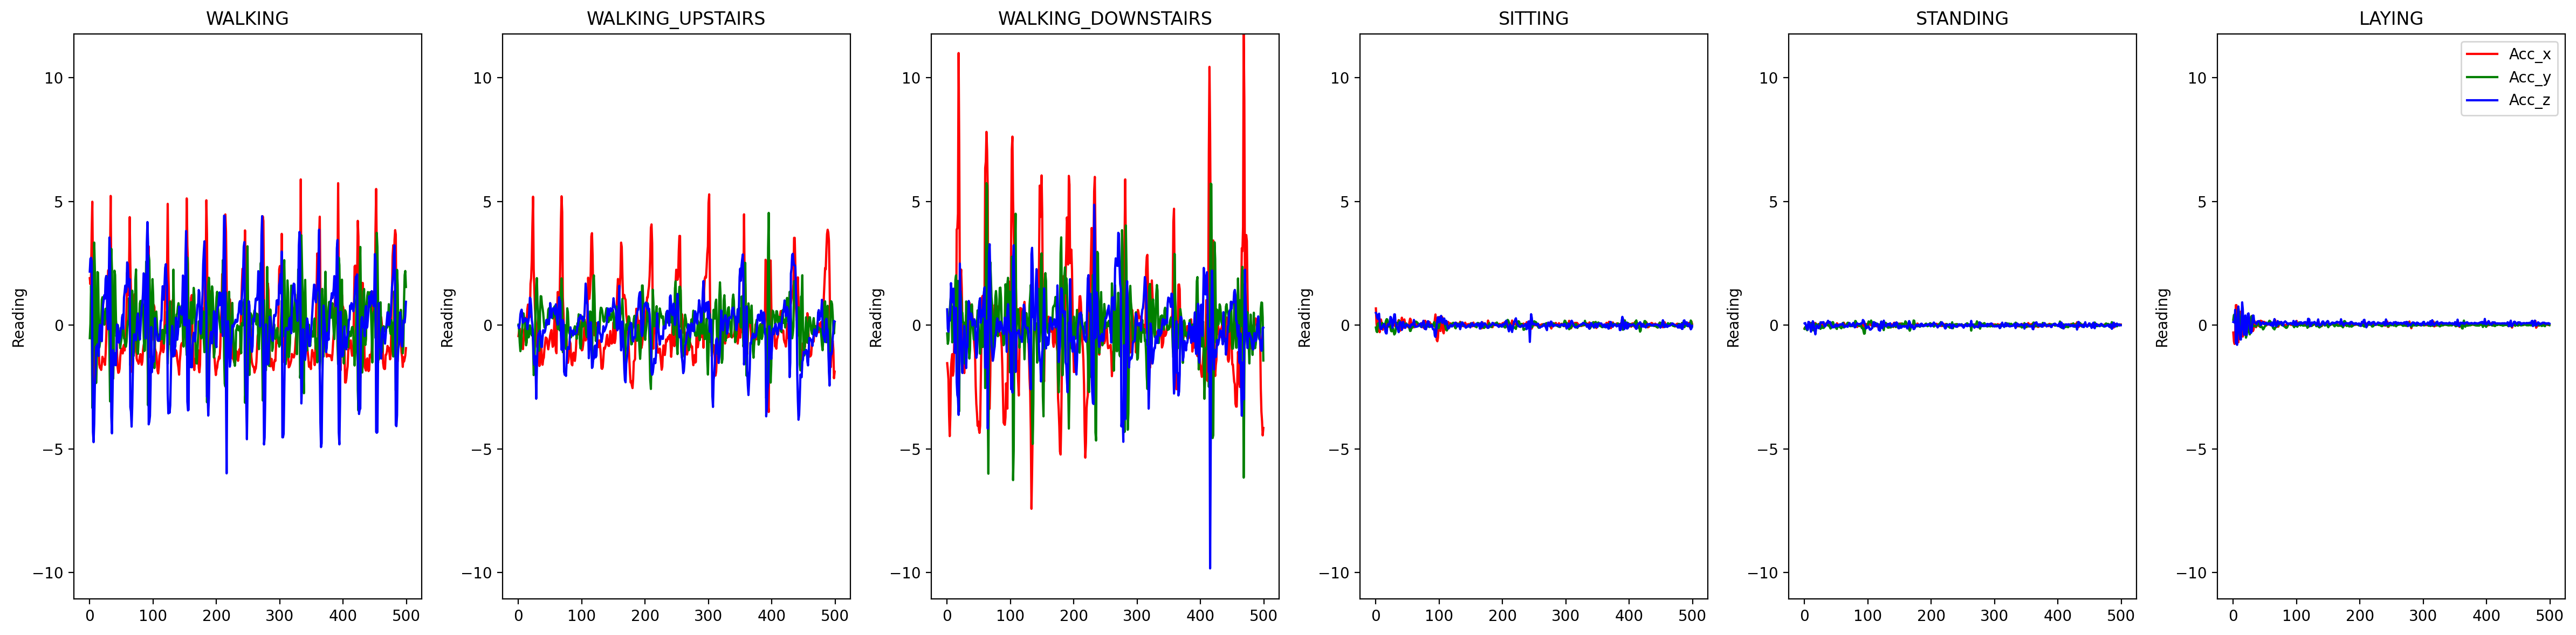

In [31]:
activities = ["Walking", "Walking_Upstairs", "Walking_Downstairs", "Sitting", "Standing", "Laying"]

# Create a reverse mapping from activity name to index
activity_to_idx = {activity: idx for idx, activity in enumerate(activities)}

min_val = np.min(X_train[:, :, :3])  # Only considering the three columns (Acc_x, Acc_y, Acc_z)
max_val = np.max(X_train[:, :, :3])

num_classes = 6
fig, axes = plt.subplots(1, num_classes, figsize=(24, 6))

for i in range(num_classes):
    # Find the first occurrence of the current activity
    activity = activities[i].upper()  # Convert to uppercase to match y_data
    activity_indices = np.where(y_data == activity)[0]
    class_idx = activity_indices[0] if len(activity_indices) > 0 else -1

    # Plotting accelerometer data
    axes[i].plot(X_train[class_idx][:, 0], label='Acc_x', color='r')
    axes[i].plot(X_train[class_idx][:, 1], label='Acc_y', color='g')
    axes[i].plot(X_train[class_idx][:, 2], label='Acc_z', color='b')
    axes[i].set_title(activity)
    axes[i].set_ylabel('Reading')
    axes[i].set_ylim([min_val, max_val])  # Set uniform y-axis limits

plt.tight_layout()
plt.legend()
plt.show()




In [32]:
print("Shape of X_total_acceleration:", np.array(X_total_acceleration).shape)
print("Expected shape (n_samples, n_features):", decision_tree_raw_data.n_features_in_)

Shape of X_total_acceleration: (24, 500)
Expected shape (n_samples, n_features): 500


## Raw Data Decision Tree

In [33]:
recorded_data_prediction = decision_tree_raw_data.predict(X_total_acceleration)
recorded_data_prediction

array(['WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS',
       'STANDING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING', 'WALKING',
       'WALKING_DOWNSTAIRS', 'WALKING', 'STANDING', 'STANDING',
       'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING',
       'STANDING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS',
       'WALKING_DOWNSTAIRS', 'STANDING', 'STANDING', 'STANDING'],
      dtype='<U18')

Accuracy = 0.125
Precision = 0.2222222222222222
Recall = 0.125
F1 Score = 0.13333333333333333


C:\Users\borat\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


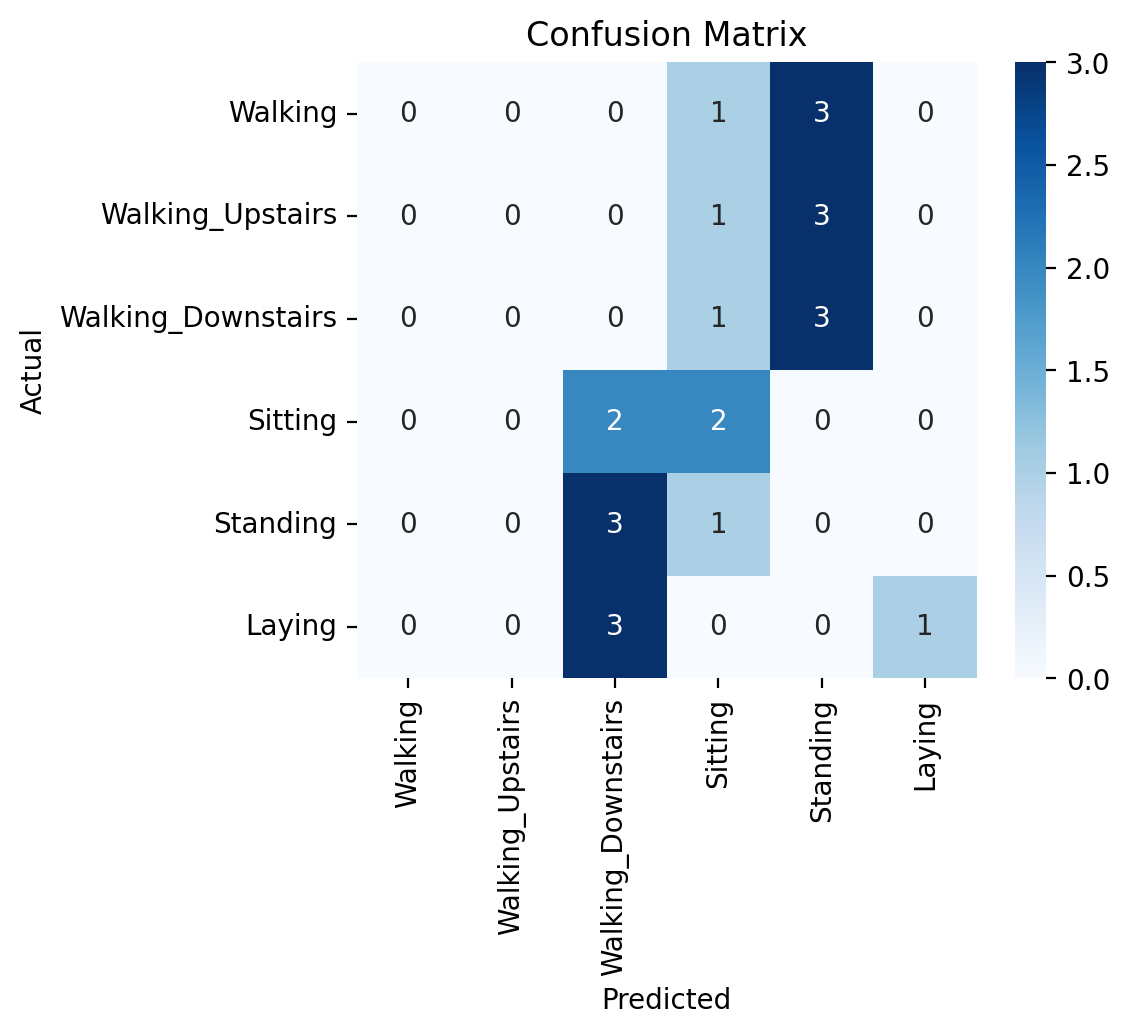

Sample 0: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
Sample 1: Predicted = WALKING_DOWNSTAIRS, Actual = SITTING
Sample 2: Predicted = WALKING_DOWNSTAIRS, Actual = STANDING
Sample 3: Predicted = STANDING, Actual = WALKING
Sample 4: Predicted = WALKING, Actual = WALKING_DOWNSTAIRS
Sample 5: Predicted = WALKING_UPSTAIRS, Actual = WALKING_UPSTAIRS
Sample 6: Predicted = WALKING, Actual = LAYING
Sample 7: Predicted = WALKING, Actual = SITTING
Sample 8: Predicted = WALKING_DOWNSTAIRS, Actual = STANDING
Sample 9: Predicted = WALKING, Actual = WALKING
Sample 10: Predicted = STANDING, Actual = WALKING_DOWNSTAIRS
Sample 11: Predicted = STANDING, Actual = WALKING_UPSTAIRS
Sample 12: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
Sample 13: Predicted = WALKING_DOWNSTAIRS, Actual = SITTING
Sample 14: Predicted = WALKING, Actual = STANDING
Sample 15: Predicted = WALKING, Actual = WALKING
Sample 16: Predicted = STANDING, Actual = WALKING_DOWNSTAIRS
Sample 17: Predicted = STANDING, Actual = WALKI

In [34]:
true_labels = y_data
predicted_labels = recorded_data_prediction
class_names = activities

print(f"Accuracy = {accuracy_score(true_labels, predicted_labels)}")
print(f"Precision = {precision_score(true_labels, predicted_labels, average='weighted')}")
print(f"Recall = {recall_score(true_labels, predicted_labels, average='weighted')}")
print(f"F1 Score = {f1_score(true_labels, predicted_labels, average='weighted')}")

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


for i in range(len(true_labels)):
    print(f"Sample {i}: Predicted = {predicted_labels[i]}, Actual = {true_labels[i]}")

## TSFEL Decision Tree


Accuracy = 0.2916666666666667
Precision = 0.19444444444444442
Recall = 0.2916666666666667
F1 Score = 0.23055555555555554


C:\Users\borat\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


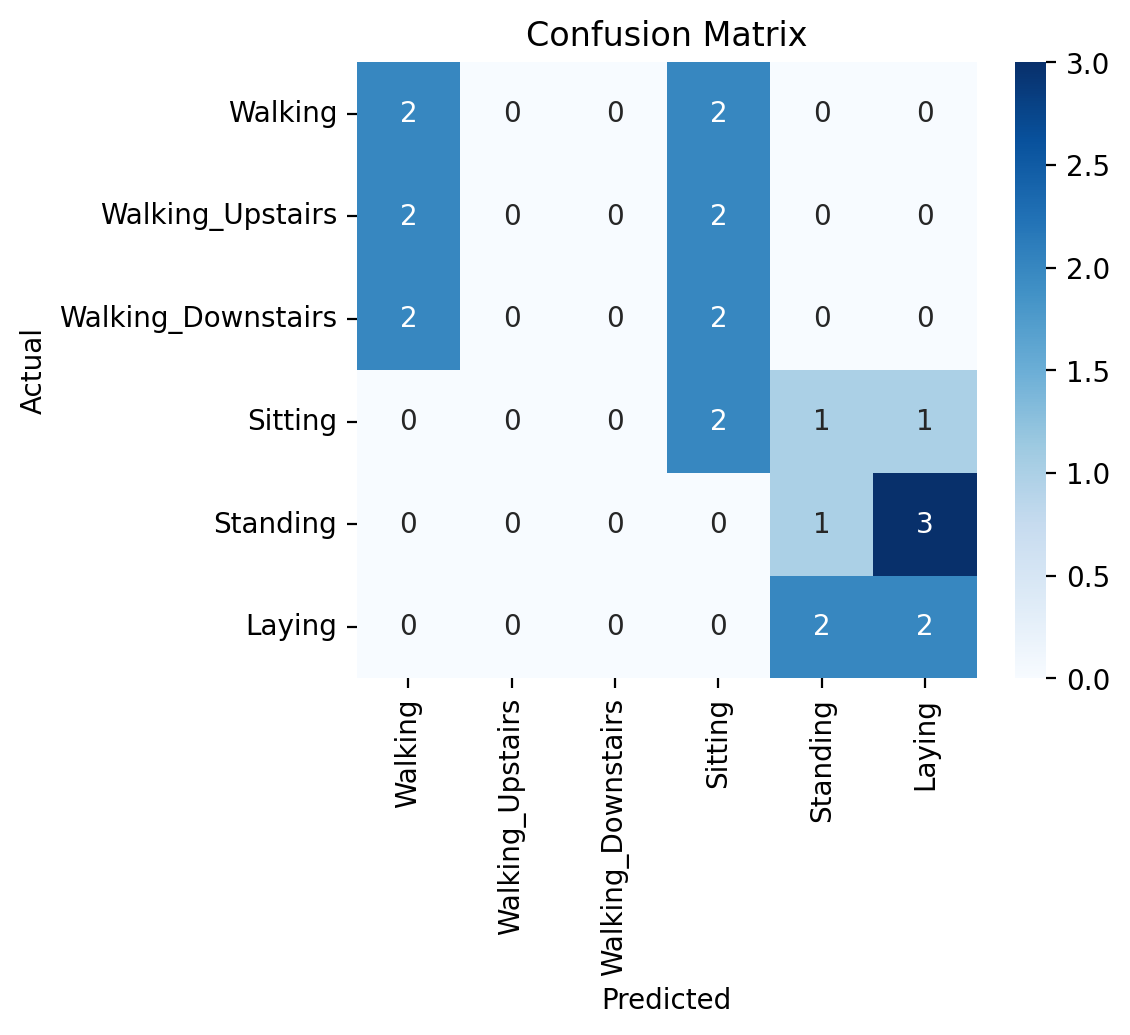

Sample 0: Predicted = LAYING, Actual = LAYING
Sample 1: Predicted = LAYING, Actual = SITTING
Sample 2: Predicted = LAYING, Actual = STANDING
Sample 3: Predicted = WALKING_DOWNSTAIRS, Actual = WALKING
Sample 4: Predicted = WALKING_DOWNSTAIRS, Actual = WALKING_DOWNSTAIRS
Sample 5: Predicted = WALKING_DOWNSTAIRS, Actual = WALKING_UPSTAIRS
Sample 6: Predicted = WALKING, Actual = LAYING
Sample 7: Predicted = WALKING, Actual = SITTING
Sample 8: Predicted = WALKING, Actual = STANDING
Sample 9: Predicted = WALKING, Actual = WALKING
Sample 10: Predicted = WALKING_UPSTAIRS, Actual = WALKING_DOWNSTAIRS
Sample 11: Predicted = WALKING_DOWNSTAIRS, Actual = WALKING_UPSTAIRS
Sample 12: Predicted = WALKING, Actual = LAYING
Sample 13: Predicted = WALKING, Actual = SITTING
Sample 14: Predicted = WALKING, Actual = STANDING
Sample 15: Predicted = WALKING, Actual = WALKING
Sample 16: Predicted = WALKING_UPSTAIRS, Actual = WALKING_DOWNSTAIRS
Sample 17: Predicted = WALKING_UPSTAIRS, Actual = WALKING_UPSTAIRS


In [35]:
extracted_features = extract_features(X_total_acceleration)
pred_labels = tsfel_decision_tree.predict(extracted_features)

print(f"Accuracy = {accuracy_score(y_data, pred_labels)}")
print(f"Precision = {precision_score(y_data, pred_labels, average='weighted')}")
print(f"Recall = {recall_score(y_data, pred_labels, average='weighted')}")
print(f"F1 Score = {f1_score(y_data, pred_labels, average='weighted')}")

conf_matrix = confusion_matrix(y_data, pred_labels)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, xticklabels=activities, yticklabels=activities, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

for i in range(len(true_labels)):
    print(f"Sample {i}: Predicted = {pred_labels[i]}, Actual = {true_labels[i]}")

### UCI HAR Data

We cant use the decision tree modelled on 561 feature data provided by the author, because we have only measured x, y, z accelerations and we dont have access to all the other features provided by the author.

**Task 3 - Question 2**

Use the data you collected to predict the activities that you performed. Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform? [1 marks]

In [101]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train,
    y_data,
    test_size=0.3,        
    random_state=42,      
    stratify=y_data      
)

print("Train shapes:", X_train_split.shape, y_train_split.shape)
print("Test shapes :", X_test_split.shape, y_test_split.shape)

Train shapes: (16, 500, 3) (16,)
Test shapes : (8, 500, 3) (8,)


Accuracy  = 0.1250
Precision = 0.0312
Recall    = 0.1250
F1 Score  = 0.0500


C:\Users\borat\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


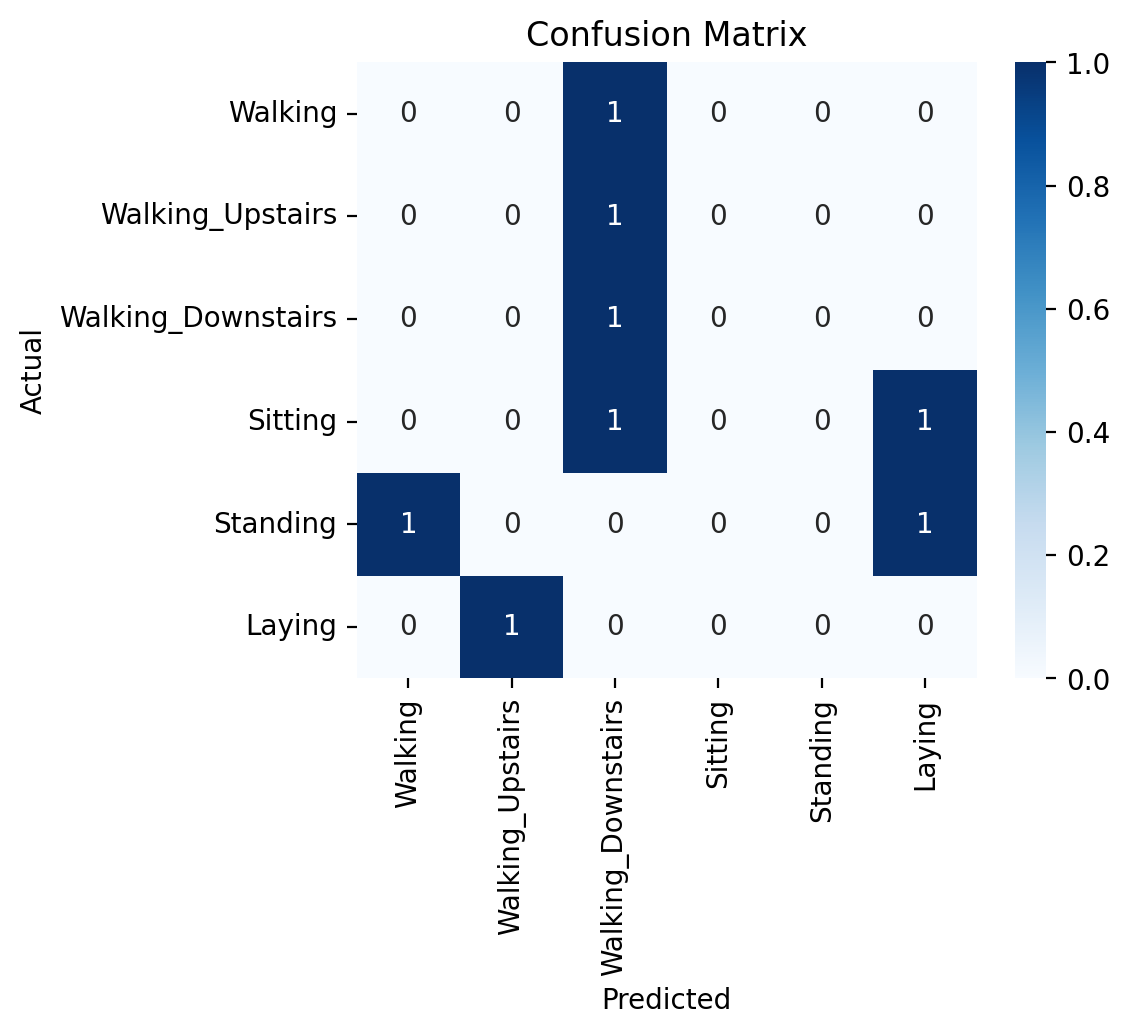

In [ ]:
X_train_flat = X_train_split.reshape(X_train_split.shape[0], -1)
X_test_flat  = X_test_split.reshape(X_test_split.shape[0], -1)

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_flat, y_train_split)

y_pred = dt_clf.predict(X_test_flat)

print(f"Accuracy  = {accuracy_score(y_test_split, y_pred):.4f}")
print(f"Precision = {precision_score(y_test_split, y_pred, average='weighted'):.4f}")
print(f"Recall    = {recall_score(y_test_split, y_pred, average='weighted'):.4f}")
print(f"F1 Score  = {f1_score(y_test_split, y_pred, average='weighted'):.4f}")

conf_matrix = confusion_matrix(y_test_split, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, xticklabels=activities, yticklabels=activities, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:



cfg = tsfel.get_features_by_domain()  
X_train_tsfel = tsfel.time_series_features_extractor(cfg, X_train_split, verbose=1,fs =50)
X_test_tsfel = tsfel.time_series_features_extractor(cfg, X_test_split, verbose=1,fs =50)






Shape of train data after removing correlated features: (16, 205)
Shape of test data after removing correlated features: (8, 205)
Accuracy  = 0.0000
Precision = 0.0000
Recall    = 0.0000
F1 Score  = 0.0000


In [119]:
corr_features = tsfel.correlated_features(X_train_tsfel, threshold=0.95)
X_train_tsfel.drop(corr_features, axis=1, inplace=True)
X_test_tsfel.drop(corr_features, axis=1, inplace=True)
print("Shape of train data after removing correlated features:",X_train_tsfel.shape)
print("Shape of test data after removing correlated features:",X_test_tsfel.shape)


scaler = StandardScaler()
X_train_tsfel_scaled = scaler.fit_transform(X_train_tsfel)
X_test_tsfel_scaled = scaler.transform(X_test_tsfel)

selector = VarianceThreshold(threshold = 0.1) # default is 0
X_train_tsfel = selector.fit_transform(X_train_tsfel)
X_test_tsfel = selector.transform(X_test_tsfel)
print("\nShape of train data after removing low variance features:",X_train_tsfel.shape)
print("Shape of test data after removing low variance features:",X_test_tsfel.shape)

scaler = StandardScaler()
X_train_tsfel_scaled = scaler.fit_transform(X_train_tsfel)
X_test_tsfel_scaled = scaler.transform(X_test_tsfel)


tsfel_pca = PCA(n_components=5)
X_train_tsfel_pca = tsfel_pca.fit_transform(X_train_tsfel_scaled)
X_test_tsfel_pca = tsfel_pca.transform(X_test_tsfel_scaled)


dt_tsfel = DecisionTreeClassifier(random_state=42)
dt_tsfel.fit(X_train_tsfel_pca, y_train_split)

y_pred_tsfel = dt_tsfel.predict(X_test_tsfel_pca)

print(f"Accuracy  = {accuracy_score(y_test_split, y_pred_tsfel):.4f}")
print(f"Precision = {precision_score(y_test_split, y_pred_tsfel, average='weighted', zero_division=0):.4f}")
print(f"Recall    = {recall_score(y_test_split, y_pred_tsfel, average='weighted',  zero_division=0):.4f}")
print(f"F1 Score  = {f1_score(y_test_split, y_pred_tsfel, average='weighted',      zero_division=0):.4f}")


Shape of train data after removing correlated features: (16, 205)
Shape of test data after removing correlated features: (8, 205)

Shape of train data after removing low variance features: (16, 90)
Shape of test data after removing low variance features: (8, 90)
Accuracy  = 0.2500
Precision = 0.1875
Recall    = 0.2500
F1 Score  = 0.2083


### Inference

#### TSFEL + PCA + Decision Tree
- Features reduced → 90 → 5 PCs  
- Accuracy: 0.25 | F1: 0.21  


#### Raw Flattened Signals + Decision Tree
- Input: 1500 features/sample  
- Accuracy: 0.125 | F1: 0.05  


VarianceThreshold / Scaling → removes useless features and puts them on the same scale good baseline.

PCA helps reduce noise & correlation, but too much compression can kill useful info.

TSFEL converts raw signals into meaningful statistical/temporal/spectral features generally better than flattening.
